# **TMDB Movies Analysis**

**The TMDb (The Movie Database) is a comprehensive movie database that provides information about movies, including details like titles, ratings, release dates, revenue, genres, and much more.**

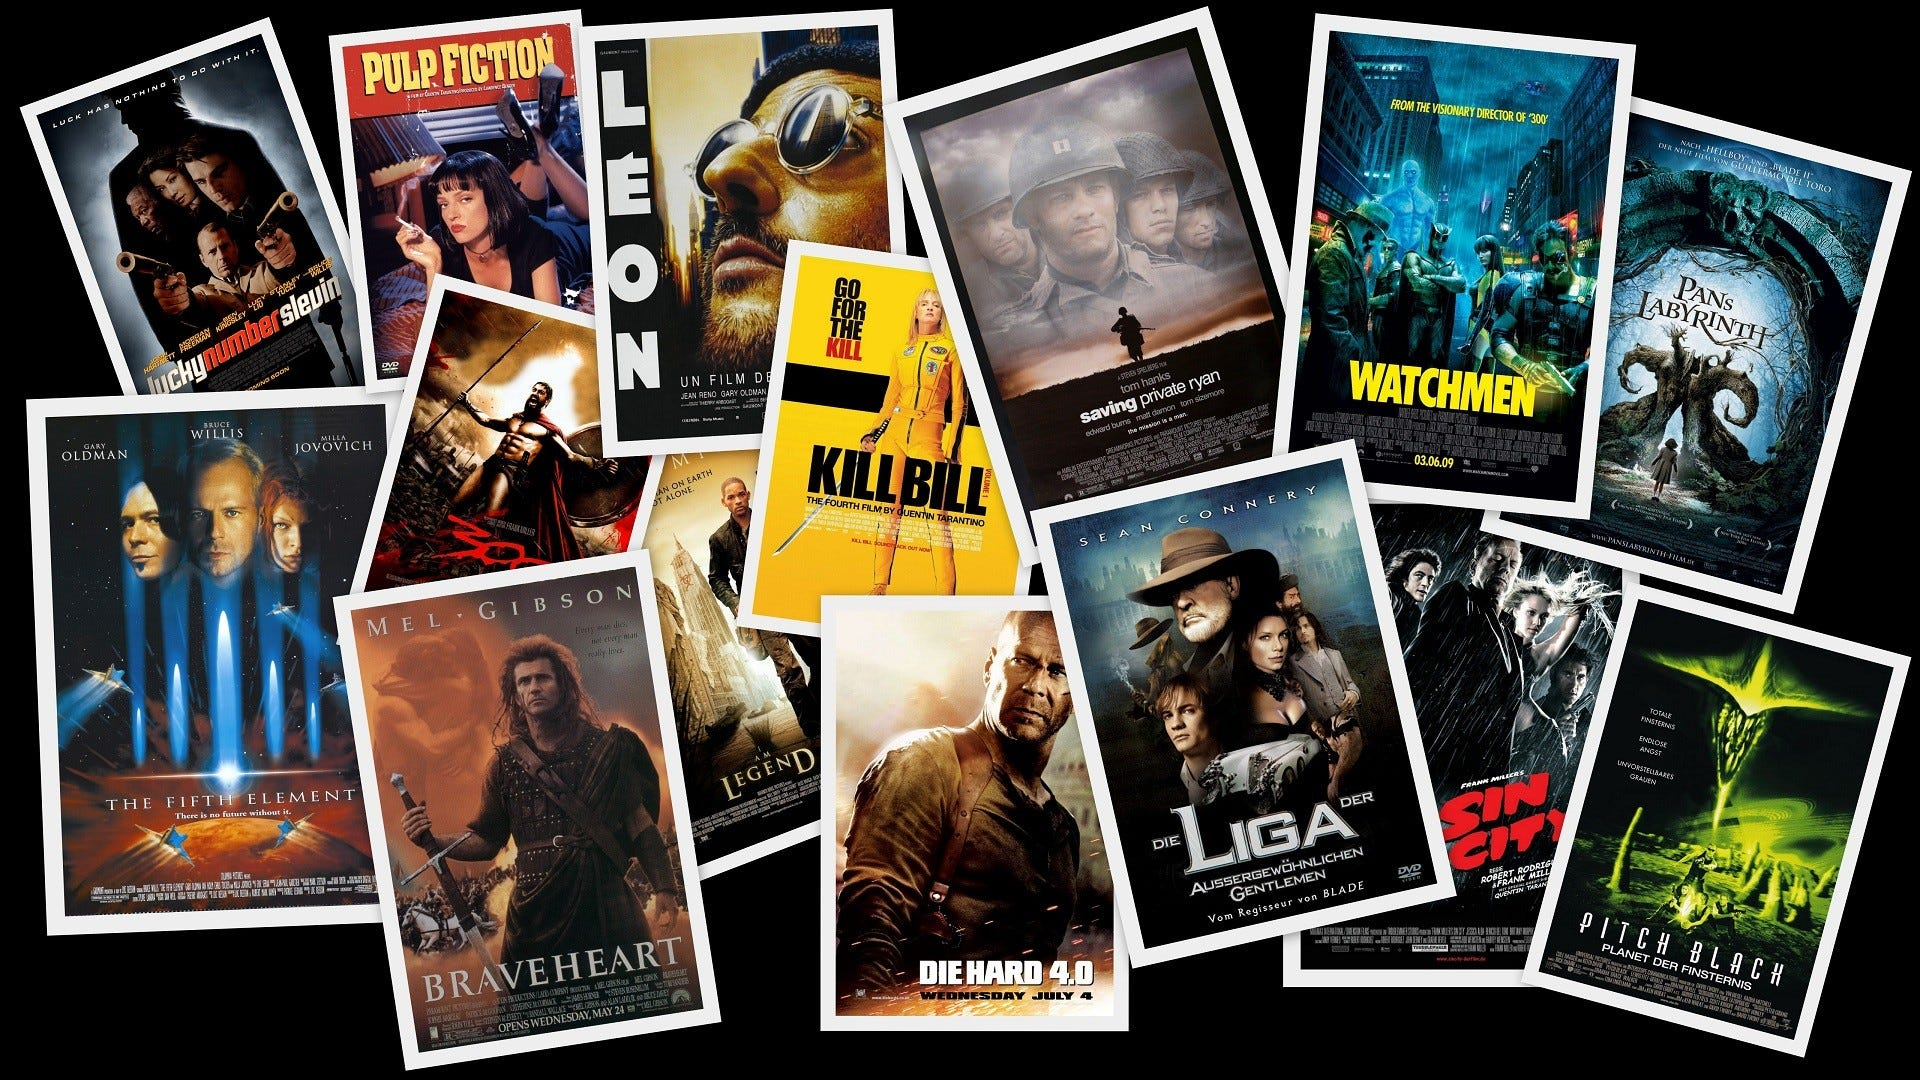

# **Import Necessary Libraries**

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Read Data as csv File**

In [112]:
df = pd.read_csv('tmdb-movies.csv')

# **Data Exploration**

In [113]:
df.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline  ...  \
0              The park is open.  ...   
1             What a Lovely Day.  ...   
2     One Choice Can Destroy You  ...   
3  Every generation has a story.  ...   
4            Vengeance Hits Home  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

In [114]:
df.shape

(10866, 21)

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

# **Data Cleaning**

**1. Check for Duplicated data**

In [116]:
df.duplicated().sum()

np.int64(1)

**Git Rid of Duplicated Data**

In [117]:
df.drop_duplicates(inplace=True)

In [118]:
df.duplicated().sum()

np.int64(0)

**2. Check for Nulls**

In [119]:
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

**as Shown above we have 9 columns with Null Values, show we should decide how will we deal with those nulls**

**We will Drop These Columns as They are not necessary for our Analysis:**

        1. Home Page.

        2. Tagline.

        3. Keywords

        4. imdb_id


**and For these Columns we will Substitute with a Specific Values:**

        1. Cast --> "Not Assigned".

        2. Director --> Mode Value.

        3. overview --> "No Overview Available"

        4. genres --> "Unknown"

        5. Production Comapnies --> Mode Value.


**1. Drop All Unnecessary Columns**

In [120]:
#drop columns that are not needed
df.drop(['id', 'imdb_id', 'homepage', 'tagline', 'keywords', 'budget_adj', 'revenue_adj'], axis=1, inplace=True)

**2. Replace Nulls with Suitable Values**

In [121]:
# Correcting the mode usage and inplace issues
df['cast'].fillna('not assigned', inplace=True)
df['director'].fillna('Unknown', inplace=True) 
df['genres'].fillna('Unknown', inplace=True)
df['overview'].fillna('No Overview Available', inplace=True)
df['production_companies'].fillna('Unkwon', inplace=True)

C:\Users\sahar.hamdy\AppData\Local\Temp\ipykernel_18824\3186970378.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cast'].fillna('not assigned', inplace=True)
C:\Users\sahar.hamdy\AppData\Local\Temp\ipykernel_18824\3186970378.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

In [122]:
df.isna().sum()

popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
dtype: int64

# **Exploratory Data Analysis (EDA)**

In [123]:
df.describe()

popularity        budget       revenue       runtime    vote_count  \
count  10865.000000  1.086500e+04  1.086500e+04  10865.000000  10865.000000   
mean       0.646446  1.462429e+07  3.982690e+07    102.071790    217.399632   
std        1.000231  3.091428e+07  1.170083e+08     31.382701    575.644627   
min        0.000065  0.000000e+00  0.000000e+00      0.000000     10.000000   
25%        0.207575  0.000000e+00  0.000000e+00     90.000000     17.000000   
50%        0.383831  0.000000e+00  0.000000e+00     99.000000     38.000000   
75%        0.713857  1.500000e+07  2.400000e+07    111.000000    146.000000   
max       32.985763  4.250000e+08  2.781506e+09    900.000000   9767.000000   

       vote_average  release_year  
count  10865.000000  10865.000000  
mean       5.975012   2001.321859  
std        0.935138     12.813260  
min        1.500000   1960.000000  
25%        5.400000   1995.000000  
50%        6.000000   2006.000000  
75%        6.600000   2011.000000  
max        9.200000   2015.000000

**Data Distribution**

In [124]:
numerical_cols = df.select_dtypes(include=[np.number]).columns

In [125]:
colors = plt.cm.Paired(np.linspace(0, 1, len(df.columns)))

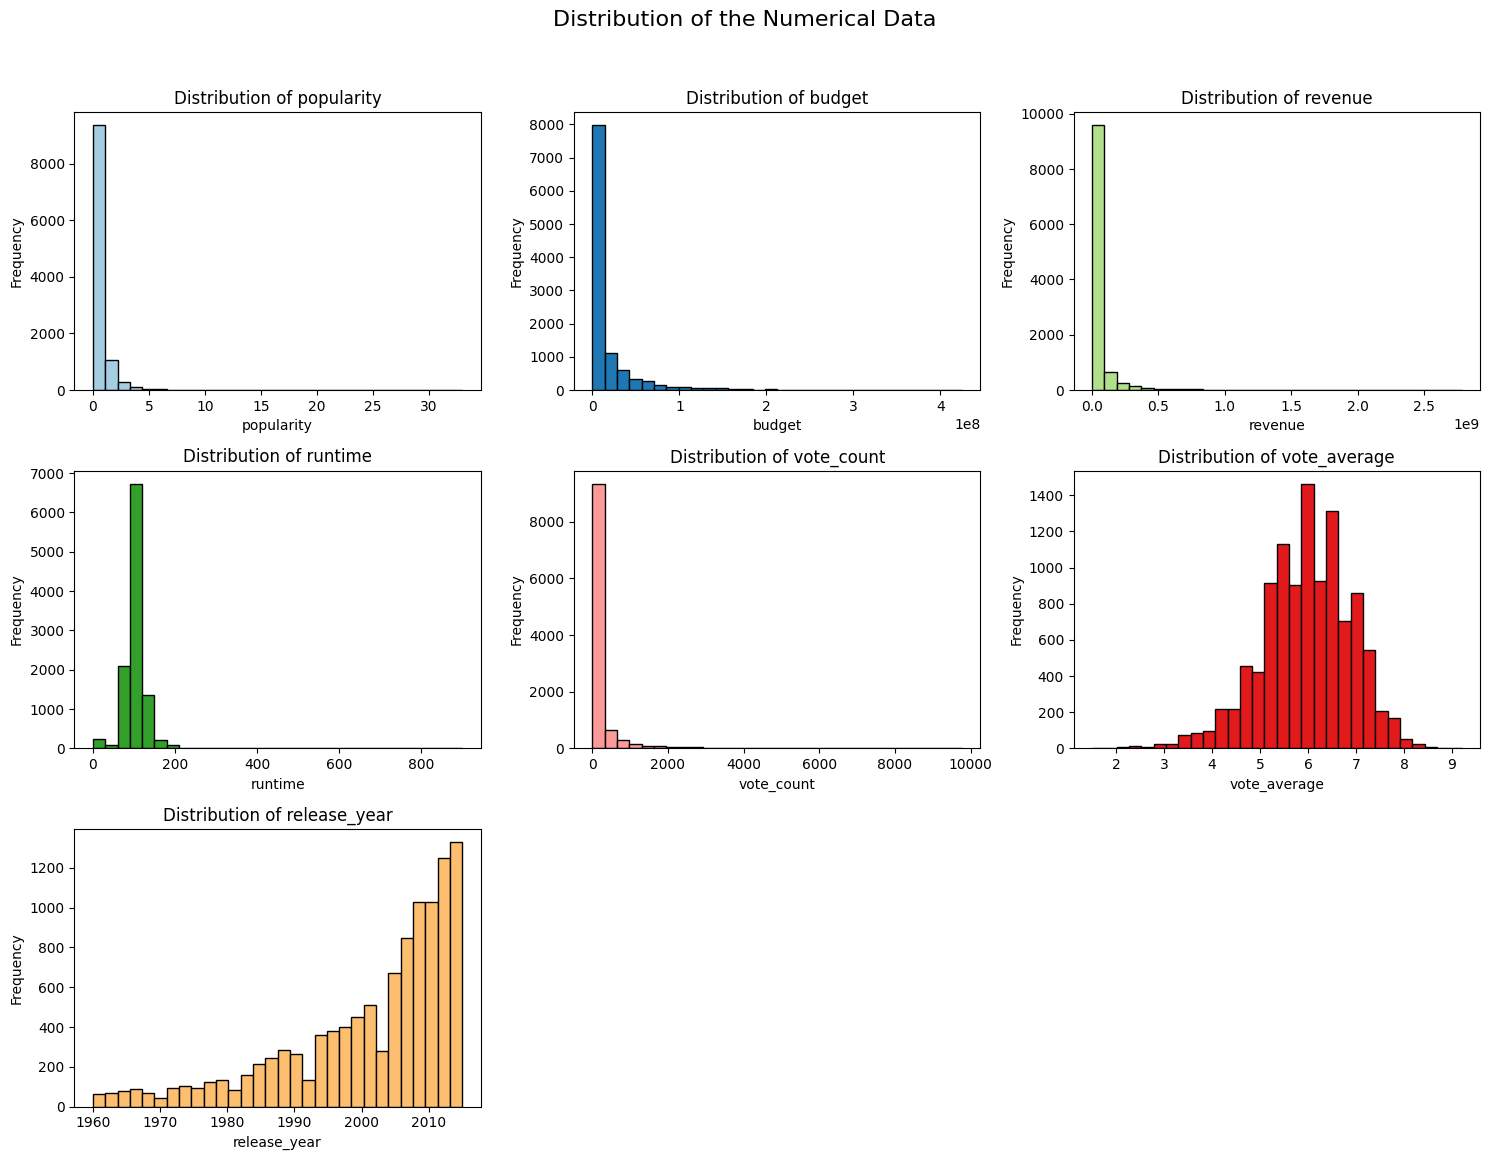

In [126]:
plt.figure(figsize=(15, 15))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)
    df[col].hist(bins=30, color=colors[i], edgecolor='black', grid=False)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.suptitle('Distribution of the Numerical Data', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

#### **The Insights we get from the Data Distribution Plot**

**1. Distripution of Popularity**

- Right-Skewed, that's mean the majority of Movies don't gain massive popularity.

**2. Distribution of Budget**

-  Heavily right-skewed, with most budgets clustered near zero, which's mean many movies have very low budgets or missing for suggesting.

**3. Distribution of Revenue**

- Like Budget it's right-skewed with most revenues near to zero, which indicates a few high grossing movies.

**4. Runtime Distribution**

- Most Movies runtime is between 80: 120 minutes

**5. Vote Count Distribution**

- Right-skewed, with most movies having low vote counts, which indicate Popular movies attract more votes, while lesser-known ones receive few.

**6. Vote Average Distribution**

- Approximate normal distribution centered around 5–6, which's Most movies are rated around average

**7. Distribution of Realease Year**

- The number of movies produced has increased over the years, reaching its peak in 2015, followed by 2014, and so forth3

# **Data Analysis Q&A**

#### **Q1: Revenue of Top 5 Geners**

In [127]:
# Step 1: Split the genres column to handle multiple genres per movie
# Create a new DataFrame by splitting genres into separate rows
genres_expanded = df.assign(genres=df['genres'].str.split('|')).explode('genres')

In [128]:
genres_expanded

popularity     budget     revenue            original_title  \
0       32.985763  150000000  1513528810            Jurassic World   
0       32.985763  150000000  1513528810            Jurassic World   
0       32.985763  150000000  1513528810            Jurassic World   
0       32.985763  150000000  1513528810            Jurassic World   
1       28.419936  150000000   378436354        Mad Max: Fury Road   
...           ...        ...         ...                       ...   
10863    0.065141          0           0       Beregis Avtomobilya   
10863    0.065141          0           0       Beregis Avtomobilya   
10864    0.064317          0           0    What's Up, Tiger Lily?   
10864    0.064317          0           0    What's Up, Tiger Lily?   
10865    0.035919      19000           0  Manos: The Hands of Fate   

                                                    cast          director  \
0      Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
0      Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
0      Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
0      Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1      Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
...                                                  ...               ...   
10863  Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...    Eldar Ryazanov   
10863  Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...    Eldar Ryazanov   
10864  Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...       Woody Allen   
10864  Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...       Woody Allen   
10865  Harold P. Warren|Tom Neyman|John Reynolds|Dian...  Harold P. Warren   

                                                overview  runtime  \
0      Twenty-two years after the events of Jurassic ...      124   
0      Twenty-two years after the events of Jurassic ...      124   
0      Twenty-two years after the events of Jurassic ...      124   
0      Twenty-two years after the events of Jurassic ...      124   
1      An apocalyptic story set in the furthest reach...      120   
...                                                  ...      ...   
10863  An insurance agent who moonlights as a carthie...       94   
10863  An insurance agent who moonlights as a carthie...       94   
10864  In comic Woody Allen's film debut, he took the...       80   
10864  In comic Woody Allen's film debut, he took the...       80   
10865  A family gets lost on the road and stumbles up...       74   

                genres                               production_companies  \
0               Action  Universal Studios|Amblin Entertainment|Legenda...   
0            Adventure  Universal Studios|Amblin Entertainment|Legenda...   
0      Science Fiction  Universal Studios|Amblin Entertainment|Legenda...   
0             Thriller  Universal Studios|Amblin Entertainment|Legenda...   
1               Action  Village Roadshow Pictures|Kennedy Miller Produ...   
...                ...                                                ...   
10863          Mystery                                            Mosfilm   
10863           Comedy                                            Mosfilm   
10864           Action                            Benedict Pictures Corp.   
10864           Comedy                            Benedict Pictures Corp.   
10865           Horror                                          Norm-Iris   

      release_date  vote_count  vote_average  release_year  
0           6/9/15        5562           6.5          2015  
0           6/9/15        5562           6.5          2015  
0           6/9/15        5562           6.5          2015  
0           6/9/15        5562           6.5          2015  
1          5/13/15        6185           7.1          2015  
...            ...         ...           ...           ...  
10863       1/1/66          11           6.5    

In [129]:
# Step 2: Calculate total revenue per genre
genre_revenue = genres_expanded.groupby('genres')['revenue'].sum().sort_values(ascending=False)

In [130]:
# Step 3: Select the top 5 genres by revenue
top_5_genres = genre_revenue.head(5)

Text(0, 0.5, '')

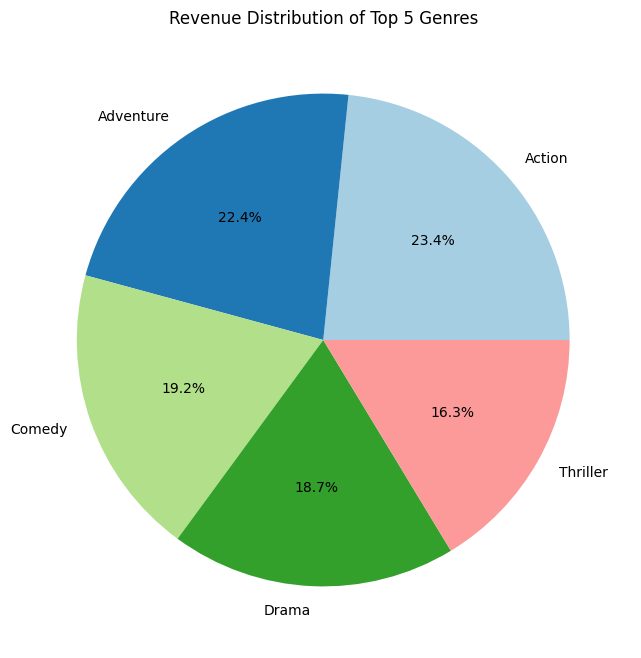

In [131]:
# Step 4: Plot a pie chart for the top 5 genres by revenue
plt.figure(figsize=(8, 8))
top_5_genres.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.Paired(np.arange(5)))
plt.title('Revenue Distribution of Top 5 Genres')
plt.ylabel('') 


#### **Q2: Top 5 Fan-Favorite Actors**

In [132]:
# Split the cast column to handle multiple cast members per movie
# Create a new DataFrame by splitting cast into separate rows
cast_expanded = df.assign(cast=df['cast'].str.split('|')).explode('cast')

In [133]:
# Step 2: Calculate total popularity per actor
actor_popularity = cast_expanded.groupby('cast')['popularity'].sum().sort_values(ascending=False)

In [134]:
#Step 3: Select the top 5 actors by popularity
top_5_actors = actor_popularity.head(5)

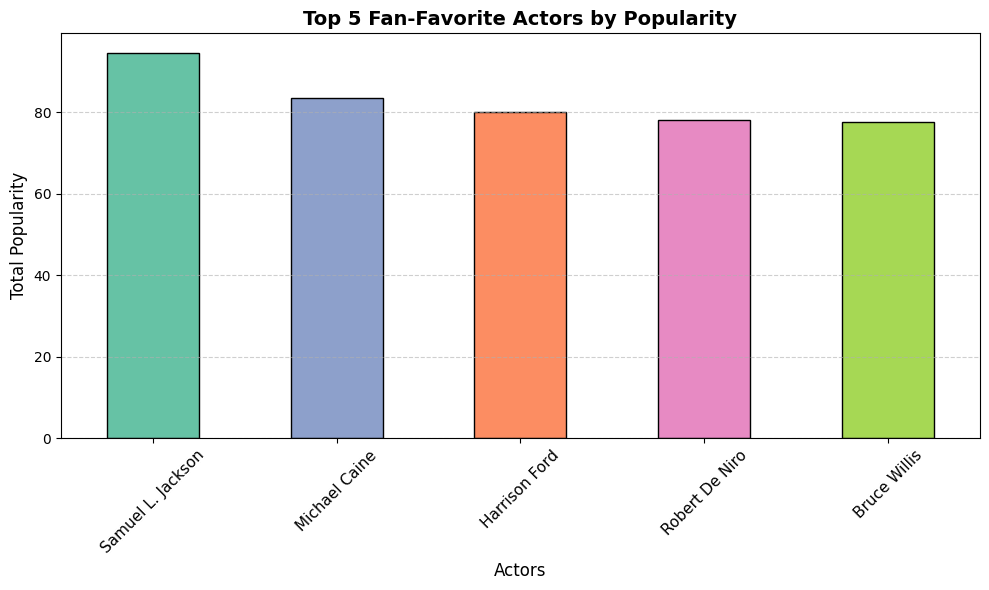

In [135]:
# Step 4: Plot a bar chart for the top 5 actors by popularity with colorful and cool colors
plt.figure(figsize=(10, 6))
cool_colors = ['#66c2a5', '#8da0cb', '#fc8d62', '#e78ac3', '#a6d854']  # Cool and vibrant colors
top_5_actors.plot(kind='bar', color=cool_colors, edgecolor='black')
plt.title('Top 5 Fan-Favorite Actors by Popularity', fontsize=14, fontweight='bold')
plt.xlabel('Actors', fontsize=12)
plt.ylabel('Total Popularity', fontsize=12)
plt.xticks(rotation=45, fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#### **Q3: Number of Movies Released per Year**

In [136]:
# Count the number of movies released each year
movies_per_year = df['release_year'].value_counts().sort_index()

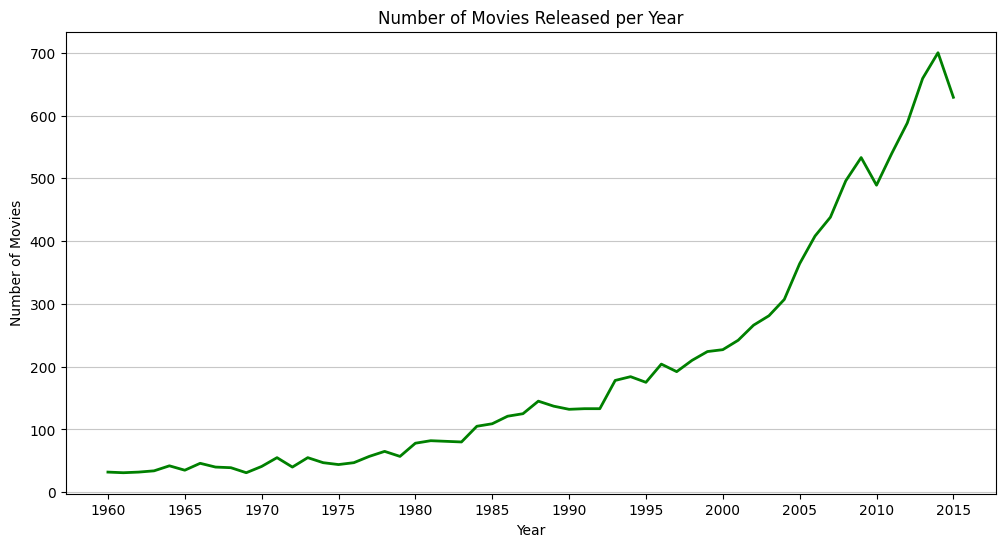

In [137]:
# Plot the number of movies released per year
plt.figure(figsize=(12, 6))
plt.plot(movies_per_year.index, movies_per_year.values, color='green', linestyle='-', linewidth=2)
plt.xticks(np.arange(1960, 2016, 5))
plt.title('Number of Movies Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(axis='y', alpha=0.7)
plt.show()


#### **Q4: Is there a specific budget range that leads to higher profitability?**

In [138]:
# Create a new column for profit
df['profit'] = df['revenue'] - df['budget']

In [139]:
# Define budget ranges (bins) and labels
budget_bins = [0, 1e7, 5e7, 1e8, 5e8, df['budget'].max()]
budget_labels = ['<10M', '10M-50M', '50M-100M', '100M-500M', '>500M']

In [140]:
# Ensure bins are sorted correctly
budget_bins = sorted(budget_bins)

In [141]:
# Create a new column for budget ranges
df['budget_range'] = pd.cut(df['budget'], bins=budget_bins, labels=budget_labels, include_lowest=True)

In [142]:
# Calculate average profit for each budget range
avg_profit_by_budget = df.groupby('budget_range')['profit'].mean().sort_index()

C:\Users\sahar.hamdy\AppData\Local\Temp\ipykernel_18824\203009624.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_profit_by_budget = df.groupby('budget_range')['profit'].mean().sort_index()


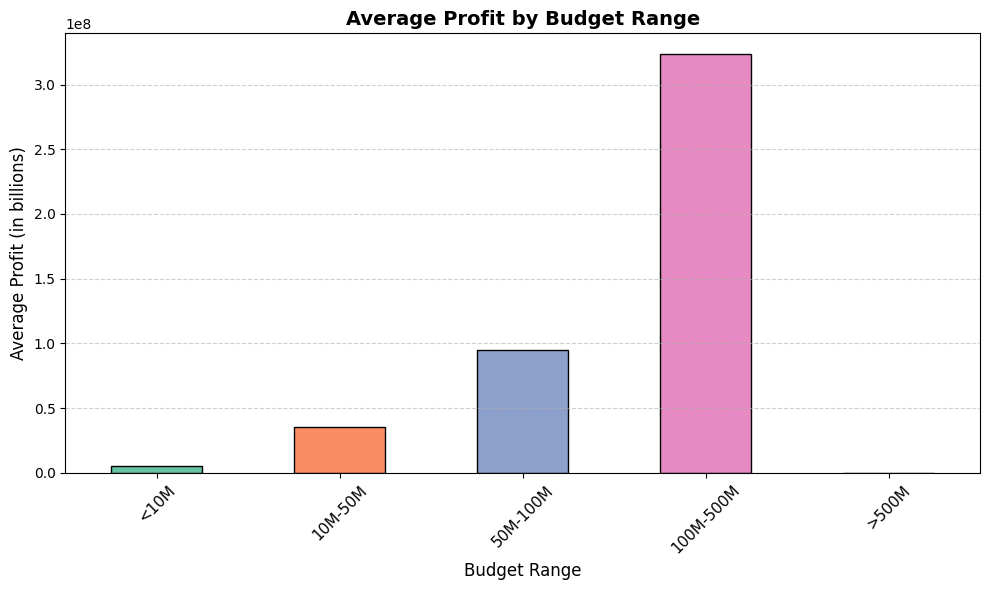

budget_range        profit
0         <10M  4.910396e+06
1      10M-50M  3.577262e+07
2     50M-100M  9.495282e+07
3    100M-500M  3.233920e+08
4        >500M           NaN

In [143]:
# Plot the average profit for each budget range with cool and colorful colors
plt.figure(figsize=(10, 6))
cool_colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854']
avg_profit_by_budget.plot(kind='bar', color=cool_colors, edgecolor='black')
plt.title('Average Profit by Budget Range', fontsize=14, fontweight='bold')
plt.xlabel('Budget Range', fontsize=12)
plt.ylabel('Average Profit (in billions)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=45, fontsize=11)
plt.tight_layout()
plt.show()

# Display the average profit for each budget range
avg_profit_by_budget.reset_index()

#### **Q5: Do longer movies have better ratings or more revenue?**

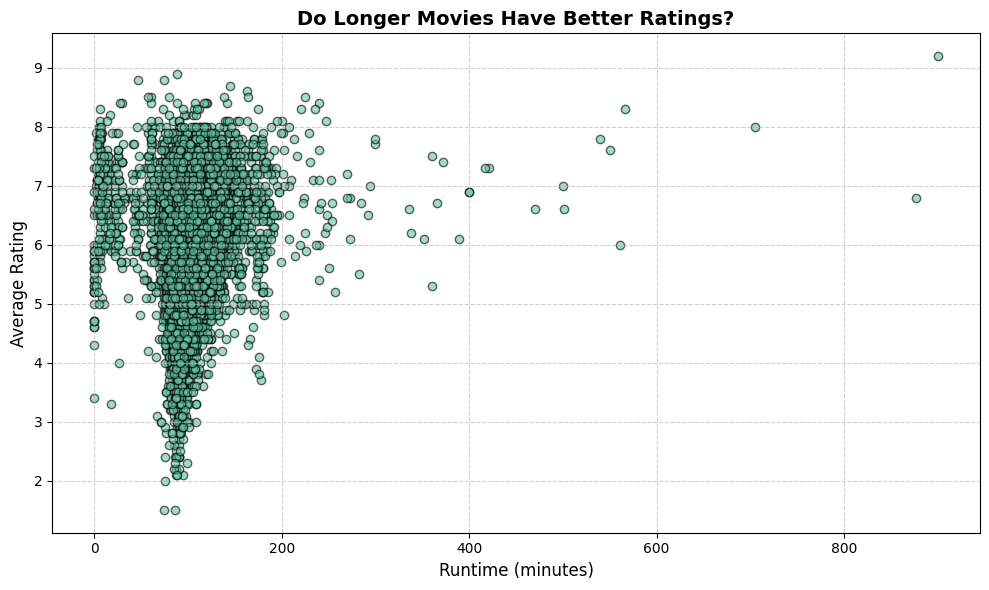

In [144]:
# Scatter plot for runtime vs vote_average (ratings)
plt.figure(figsize=(10, 6))
plt.scatter(df['runtime'], df['vote_average'], alpha=0.6, color='#66c2a5', edgecolor='black')
plt.title('Do Longer Movies Have Better Ratings?', fontsize=14, fontweight='bold')
plt.xlabel('Runtime (minutes)', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

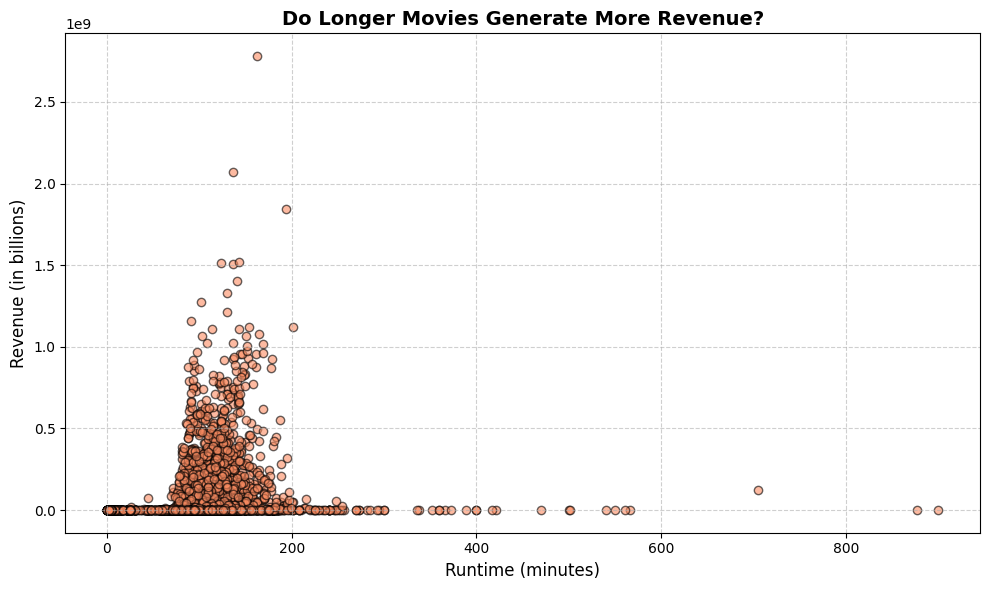

In [145]:
# Scatter plot for runtime vs revenue (financial success)
plt.figure(figsize=(10, 6))
plt.scatter(df['runtime'], df['revenue'], alpha=0.6, color='#fc8d62', edgecolor='black')
plt.title('Do Longer Movies Generate More Revenue?', fontsize=14, fontweight='bold')
plt.xlabel('Runtime (minutes)', fontsize=12)
plt.ylabel('Revenue (in billions)', fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [146]:
# Calculate correlation coefficients
corr_rating = df['runtime'].corr(df['vote_average'])
corr_revenue = df['runtime'].corr(df['revenue'])

In [147]:
(corr_rating, corr_revenue)  # Display correlation coefficients

(np.float64(0.1568129694330443), np.float64(0.16282967830819364))

#### **Q6: Top 10 Films by Revenue**

In [148]:
# Sort the DataFrame by revenue in descending order and get the top 10 films
top_revenue_films = df[['original_title', 'revenue', 'release_year']].sort_values(by='revenue', ascending=False).head(10)

# Display the top 10 films by revenue
print("Top 10 Films by Revenue:")
print(top_revenue_films)

Top 10 Films by Revenue:
                                    original_title     revenue  release_year
1386                                        Avatar  2781505847          2009
3                     Star Wars: The Force Awakens  2068178225          2015
5231                                       Titanic  1845034188          1997
4361                                  The Avengers  1519557910          2012
0                                   Jurassic World  1513528810          2015
4                                        Furious 7  1506249360          2015
14                         Avengers: Age of Ultron  1405035767          2015
3374  Harry Potter and the Deathly Hallows: Part 2  1327817822          2011
5422                                        Frozen  1274219009          2013
5425                                    Iron Man 3  1215439994          2013


C:\Users\sahar.hamdy\AppData\Local\Temp\ipykernel_18824\3566569851.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_revenue_films, x='revenue', y='original_title', palette='cool', edgecolor='black')


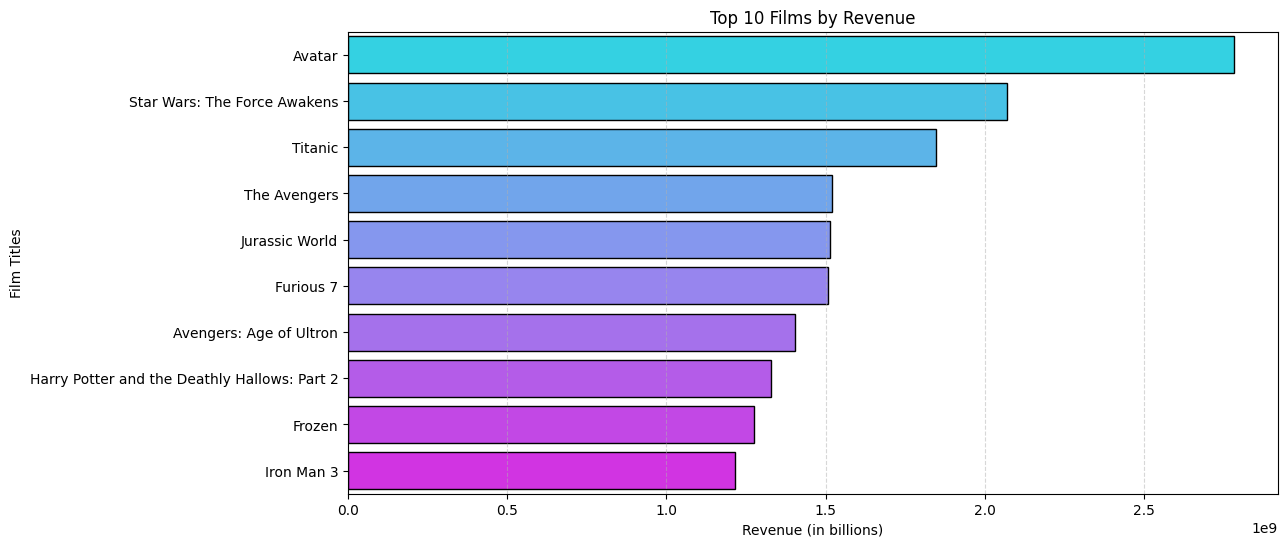

In [149]:
# Plotting a bar chart for the top 10 films by revenue
plt.figure(figsize=(12, 6))
sns.barplot(data=top_revenue_films, x='revenue', y='original_title', palette='cool', edgecolor='black')
plt.title('Top 10 Films by Revenue')
plt.xlabel('Revenue (in billions)')
plt.ylabel('Film Titles')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()